# <span style="color:#1111AA">Modulation: Phase and Frequency Modulation</span>

# Table of Contents

# 1. Overview

## 1.1. Introduction

Phase modulation encodes information as a time dependent phase factor of a carrier wave. The phase modulation can be added on purpose to transmit information, which is utilised in a wide range of radio wave based technologies, such as satellite TV, in the GSM grid and WiFi. 

Frequency modulation instead encodes the information in the frequency of the field. Frequency modulation is commonly used for broadcasting radio, but it is used in a wide range of other technology as well.

Modulation can also be used to read out information about an unknown mechanism or source that modulates the laser field, which is the case for interferometers that are used to measure relative distances, for example gravitational wave detectors. A gravitational wave that passes by a gravitational wave detector will phase modulate the laser fields in the detector as it changes the path length of the field. The rest of the advanced technology is for converting and extracting the phase modulation signal as efficiently as possible, and for supressing noise. 

This session will introduce the basics of phase and frequency modulation, and show how we simulate them with FINESSE using the sideband picture.

## 1.2. Prerequisites and reading material

We recommend that you have done the following notebooks before starting this one:
* 01_Introduction
    * 01_Ipython_notebook
        * [01_Ipython_notebook](../../01_Introduction/01_Ipython_notebook/01_Ipython_notebook.ipynb)
    * 02_Finesse
        * [01_Introduction](../../01_Introduction/02_Finesse/01_Introduction.ipynb)
    * 03_Pykat
        * [01_Introduction](../../01_Introduction/03_Pykat/01_Introduction.ipynb)
        * [02_Plotting_Examples](../../01_Introduction/03_Pykat/02_Plotting_Examples.ipynb)

or have corresponding basic experience of Ipython notebooks, PyKat, and Finesse. The links above only works if you started ipython notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more frequently.

## 1.3. After this session you will...

* be able to use an Electro-Optic Modulator to phase modulate an optical field in FINESSE.
* have read that FINESSE uses the sideband picture to represent modulated fields.
* be able to answer if the total power changes with modulation index for phase and frequency modulation

# 2. Optical phase modulation

## 2.1. Importing packages

Importing python and PyKat packages that we will need, and setting up how to display figures.

In [11]:
import numpy as np                         # Importing numpy
import matplotlib                          # Importing matplotlib, so we can plot figures
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change the dpi value to adjust size of figures on your screen.
pykat.init_pykat_plotting(dpi=90)          

## 2.2. Phase modulation

In phase modulation, a signal is encoded in the phase of a carrier field. Suppose we have a carrier field $E_c(t) = E_0\cos\big(2\pi f_\mathrm{c} t + \varphi_c \big)$, where $E_0$ is the amplitude, $f_c$ is the frequency and $\varphi_c$ is a phase term. Furthermore, suppose that the signal that is phase modulated onto the carrier field is $x(t) = m\sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})$, then the modulated field is described by 

\begin{align}
E(t) =& E_0\cos \big[ 2\pi f_\mathrm{c} t + \varphi_c + x(t) \big] \\
     =& E_0\cos \big[ 2\pi f_\mathrm{c} t + \varphi_c + m\sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big] .
\end{align}

The *modulation frequency* $f_\mathrm{m}$ determines how quickly the phase changes, the *modulation index* $m$ determines the amplitude of the phase oscillations, and the *modulation phase* $\varphi_\mathrm{m}$ is a constant phase term of the signal.

## 2.3 Frequency modulation

For frequency modulation the signal is, not very surpsingly, encoded in the frequency of the carrier field. Recall that the frequency $f$ of a field $E(t) = \sin\big(\phi(t)\big)$ is defiend as $2\pi f = \frac{\mathrm{d} \phi(t) }{\mathrm{d} t}$. Thus, to encode the the signal in the frequency, asuming we have the same carrier and signal as we used above for phase modulation, we need to satisfy


\begin{align}
2\pi f =& 2\pi f_c + m\sin(2\pi f_\mathrm{m}t + \varphi_\mathrm{m}) =  \frac{\mathrm{d} \phi(t) }{\mathrm{d} t}.
\end{align}

The solution is $\phi(t) = 2 \pi f_c t - \frac{m}{2\pi f_\mathrm{m}} \cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m} ) + \varphi_c$, which gives the frequency modulated field

\begin{align}
E(t) = E_0\cos\big[ 2 \pi f_c t + \varphi_c - \frac{m}{2\pi f_\mathrm{m}} \cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m} ) \big].
\end{align}

To explicitly show that this is mathematically exactly the same as phase modulation, we define $m' = \frac{m}{2\pi f_\mathrm{m}}$ and $\varphi'_\mathrm{m} = \varphi_\mathrm{m} + \frac{3\pi}{2}$. By inserting these into the expression above, we end up with

\begin{align}
E(t) = E_0\cos\big[ 2 \pi f_c t + \varphi_c + m'\sin(2\pi f_\mathrm{m} t + \varphi'_\mathrm{m} ) \big],
\end{align}

which is identical to the expression we had for phase modulation. The difference between phase modulation and frequency modulation lays in how they are technically created, and that a modulation index for phase modulation is normally smaller than 10, while usually above 10 000 for frequency modulation.

## 2.4 Example code visualising phase modulation

We can see an example of phase modulation below, where the figure is generated by using a carrier frequency $f_c = 20$ Hz, a modulation frequency $f_{\mathrm{m}} = 2$ Hz, and a modulation index $m=5$. Normally $f_{m} << f_c$, and $m<<1$, but for visualising purposes we exaggerate both the modulation frequency and the modulation index in this example. Both the overall phase term $\varphi_c$ and the modulation phase term $\varphi_\mathrm{m}$ are set to zero. Play around with the parameters and the code if you want to see what happens when changing some parameters.

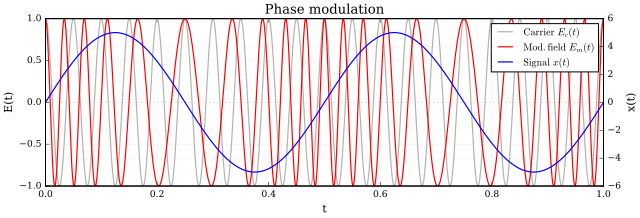

In [3]:
## Code for showing a phase modulated field ##

# Parameters
# --------------------------------------------------
t = np.linspace(0,1,2048)   # Time array
E0 = 1                      # Amplitude of the field.
fc = 20                     # Carrier freq
phi_c = 0                   # Phase of the field
fm = 2                      # Phase modulation freq
m = 5                       # Modulation index
phi_m = 0                   # Modulation phase

# Computing the fields and signal arrays
# --------------------------------------------------
# Carrier field
E = E0*np.cos(fc*2*np.pi*t + phi_c)
# Signal 
x = m*np.sin(fm*2*np.pi*t + phi_m)
# Phase modulated field
E_m = E0*np.cos(fc*2*np.pi*t + phi_c + m*np.sin(fm*2*np.pi*t+phi_m))

# Plotting
# --------------------------------------------------
fig = plt.figure(figsize=(10,3))

# Axis for carrier and modulated field
ax = plt.subplot(1,1,1)
p1 = ax.plot(t,E,'0.7', label='$\mathrm{Carrier}\ E_c(t)$')
p2 = ax.plot(t,E_m,'r',label='$\mathrm{Mod. field}\ E_m(t)$')
ax.set_xlabel('t')
ax.set_ylabel('E(t)')
ax.set_title('Phase modulation')
ax.set_xlim(-0.01,1.01)

# Second y-axis for signal
ax2 = ax.twinx()
p3 = ax2.plot(t,x,'b', label='$\mathrm{Signal}\ x(t)$')
ax2.set_ylabel('x(t)')

# The legend
plots = p1+p2+p3
labs = [lab.get_label() for lab in plots]
ax.legend(plots, labs, loc=1, fontsize=10)

# Showing figure
plt.show(fig)

<font size="2"> **Figure.** The figure shows a phase modulated field $E_m(t) = E_0\cos\big(2\pi f_\mathrm{c} t + \varphi_c + m\sin(2\pi f_\mathrm{m} t + \varphi_m) \big)$ in red, the carrier field $E_c(t) = E_0\cos (2\pi f_\mathrm{c} t)$ in grey, and the signal $x(t) = m \sin(2\pi f_\mathrm{m} t + \varphi_m)$ in blue.

In the figure above we can clearly see that (i) the phase of the modulated field oscillated around the original field, and (ii) that the amplitude is kept constant. These are two important characteristics of a purely phase modulated field.

## 2.5. Phase modulation in the sideband picture

Using complex notation, a phase modulated electric field at an arbitrary fixed point in space can be described by $E_\mathrm{m}(t) = E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t + m\cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big)$, where the overall phase $\varphi_c$ has been included in the now complex amplitude $E_0$. The tricky factor $\exp \big( im\cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m} ) \big)$ can be Taylor expanded around $m=0$. For small modulation indiced $(m<<1)$, we can approximate the series well with only the first order terms of the Taylor series:

\begin{align}
E_\mathrm{m}(t) &= E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t + m\cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big) \\ 
&\approx E_0\exp \big( 2\pi i f_\mathrm{c} t\big) \bigg[ 1 + \frac{i m}{2}\Big( \exp\big( -i(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) + \exp\big( i( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big) \bigg] \\
       &= a_0 \mathrm{e}^{2\pi i f_c t} + a_- \mathrm{e}^{2\pi i f_- t} + a_+ \mathrm{e}^{2\pi i f_+ t} ,
\end{align}

where $f_\pm = f_c \pm f_\mathrm{m}$. Thus, the effect of a weak phase modulation (small $m$) is two new frequency components, one on each side of the carrier. We call these *sidebands* of the carrier. The stronger phase modulation, the more sideband pairs are needed to be taken into account. That is, we would need to add frequency components of $f_c \pm 2f_\mathrm{m}$, $f_c \pm 3f_\mathrm{m}$, $f_c \pm 4f_\mathrm{m}$ and so on, as the modulation index $m$ increases. The figure below shows how a phase modulated field can be represented in the frequency domain. 

For phase modulation the modulation index is usually small, for our purposed usually well below 1, which means only a few sideband pairs are needed to be taken into acocunt. This is demonstrated in the exmaple in the next section. However, to represent frequency modulation in the sideband picture, a long series of sideband pairs would usually be needed. 

<img src="pm_sidebands.png" style="width: 500px;"/>

<font size="2">**Figure.** The figure shows how a phase modulated field in the frequency domain, where the carrier is in read and the sidebands are in blue. </font>

For a more thorough explanation on phase and frequency modulation and the sideband picutre, see sections 3.2 - 3.3 in the living review article [1].

## 2.4 Finesse example

In this example we use a laser and an *Electro-Optic Modulator* (EOM, keyword `mod`) to show how the amplitude of the carrier and the sidebands varies with the modulation index $m$. The setup can be seen in the figure below. We use *amplitude detectors* (keyword `ad`) to look at the ampitude of the frequency components. Amplitude detectors does not exist, but a nice property of numerical models is that we can make impossible "measurements".

<img src="phase_modulation.png" style="width: 400px;"/>

<font size="2">**Figure.** The figure shows the setup used in this session. The component names match the FINESSE model created below. </font>

We start by bulding the base model:

In [4]:
basekat = finesse.kat()          # Initialising Finesse
basekat.verbose = False          # Tells Finesse to talk less

# Finesse code
code = """
## The optical system ##
l laser 1 0 n0                # 1 W laser with 0 offset wavelength (thus default 1064nm used)
s s1 1 n0 n1                  # Space from laser to mirror (1 m)
mod eom 1k 0.3 5 pm 0 n1 n2   # Modulator (f=1 kHz, m=0.3, 5 sideband pairs, phase modulation, 0 degree mod. phase)
s s2 1000 n2 n3               # Space from modulator to output (1 m)
"""

# Parsing the Finesse code
basekat.parseKatCode(code)

Now we add the amplitude detectors, and specify what we want to simulate, and run the simulation:

In [5]:
kat1 = deepcopy(basekat)

code = """
## Detectors ##
ad car 0 n3                   # Ampitude dector for the carrier (0 freq offset)
ad up1 1k n3                  # Ampitude dector for the first upper sideband (1 kHz freq offset)
ad up2 2k n3                  # Ampitude dector for the second upper sideband (2 kHz freq offset)
ad up3 3k n3                  # Ampitude dector for the third upper sideband (3 kHz freq offset)
ad up4 4k n3                  # Ampitude dector for the fourth upper sideband (4 kHz freq offset)
ad up5 5k n3                  # Ampitude dector for the fourth upper sideband (5 kHz freq offset)

## Instructions ##
xaxis eom midx lin 0 6 200   # Varying the modulation index of the modulator between 0 and 1.
yaxis abs                     # Showing amplitude of the frequncy components.
"""

# Parsing the code and running the simulation
kat1.parseCommands(code)
out1 = kat1.run()

Plotting the simulation results:

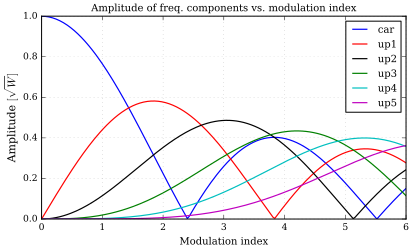

In [6]:
# Only plotting the 
fig1 = out1.plot(title = 'Amplitude of freq. components vs. modulation index', 
                 ylabel='Amplitude $[\sqrt{W}]$',  
                 xlabel='Modulation index')

In the figure above we see that as the modulation index increases from zero, more and more amplitude is taken from the carrier and fed into the sidebands, and the amplitudes oscillates as the modulation index grows larger. The sideband picture of a modulated field is a Taylor expansion around $m = 0$ using a truncated sum of Bessel-functions. 

# 3. Tasks

## 3.1. Conservation of energy

Assuming we have a lossless EOM, the power going into the EOM can be assumed to be the same as the power coming out. Use the example above as a base and modify it to show that the energy is conserved up to some modulation index. 

** Answer: **

# 4. Tasks with answers

## 4.1. Conservation of energy

Assuming we have a lossless EOM, the power going into the EOM can be assumed to be the same as the power coming out. Use the example above as a base and modify it to show that the energy is conserved up to some modulation index. 

** Answer: **

The important parts to remember here are 
* that we need to use the lower sidebands as well (which were excluded in the example above) 
* how to compute the DC-power (see the beginning of section 4 in the living review [1]) 
* that the amplitude in Finesse is defined as $\sqrt{W}$ 
* that FINESSE with amplitude detectors and the command '`yaxis` `abs`' gives us the absolute value of the amplitudes.

So, we convince ourselves that the DC-power is obtained by first squaring the absolute value of the amplitude of each frequency components, and then summing over all frequency components. 

We also add a photo diode to detect the DC-power to see if there is a difference to our calculations.

In [7]:
# Copying our core model
kat2 = deepcopy(basekat)

# Adding detectors and instructions
code = """
## Detectors ##
ad car 0 n3                   # Ampitude dector for the carrier (0 freq offset)
ad up1 1k n3                  # Ampitude dector for the first upper sideband (1 kHz freq offset)
ad low1 -1k n3                # Ampitude dector for the first lower sideband (-1 kHz freq offset)
ad up2 2k n3                  # Ampitude dector for the second upper sideband (2 kHz freq offset)
ad low2 -2k n3                # Ampitude dector for the second upper sideband (-2 kHz freq offset)
ad up3 3k n3                  # Ampitude dector for the third upper sideband (3 kHz freq offset)
ad low3 -3k n3                # Ampitude dector for the third upper sideband (-3 kHz freq offset)
ad up4 4k n3                  # Ampitude dector for the fourth upper sideband (4 kHz freq offset)
ad low4 -4k n3                # Ampitude dector for the fourth upper sideband (-4 kHz freq offset)
ad up5 5k n3                  # Ampitude dector for the fourth upper sideband (5 kHz freq offset)
ad low5 -5k n3                # Ampitude dector for the fourth upper sideband (-5 kHz freq offset)

pd pow n3                     # Photo diode for detecting DC-power

## Instructions ##
xaxis eom midx lin 0 6 200   # Varying the modulation index of the modulator between 0 and 1.
yaxis abs                 # Returns complex representation of the amplitudes
"""

# Parsing the code and running the simulation
kat2.parseKatCode(code)
out2 = kat2.run()

To compute the power we can either manually call each detector output by `out2['detector_name']` and sum these, but as we want to sum the output of many detectors, we can preferably use the output matrix `out.y` instead. However, we need to know how the output data is structured. If we do not have it fresh in memory, we can see this by checking `out.ylabels` and the shape of `out.y`:

In [8]:
print(out2.ylabels)
print(out2.y.shape)

['car', 'up1', 'low1', 'up2', 'low2', 'up3', 'low3', 'up4', 'low4', 'up5', 'low5', 'pow']
(201, 12)


Thus, we can conclude that the data is stored in a matrix where each column belongs to one detector, with the first column belonging to the carrier amplitude detector, named `car`. Now we can compute the total power:

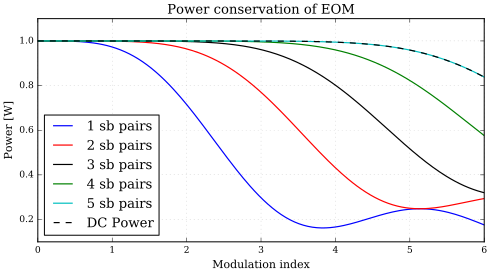

In [10]:
# Computing power
# ---------------
P1 = (out2.y[:,0:3]**2).sum(axis=1)    # With one sideband pair
P2 = (out2.y[:,0:5]**2).sum(axis=1)    # With two sideband pairs
P3 = (out2.y[:,0:7]**2).sum(axis=1)    # With three sideband pairs
P4 = (out2.y[:,0:9]**2).sum(axis=1)    # With four sideband pairs
P5 = (out2.y[:,0:11]**2).sum(axis=1)   # With five sideband pairs

# Plotting
# ---------
fig2 = plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
ax.plot(out2.x, P1, label='1 sb pairs')
ax.plot(out2.x, P2, label='2 sb pairs')
ax.plot(out2.x, P3, label='3 sb pairs')
ax.plot(out2.x, P4, label='4 sb pairs')
ax.plot(out2.x, P5, label='5 sb pairs')
ax.plot(out2.x, out2['pow'],'k--', label='DC Power')
# Labels and legend
ax.set_title('Power conservation of EOM')
ax.set_ylabel('Power [W]')
ax.set_xlabel('Modulation index')
ax.legend(loc=3)
plt.show(fig2)

As wee see in the figure above, more and more sideband pairs need to be taken into account the higher the modulation index is. However, for all simulations we do with phase modulation, the modulation index is safely below 1. 

# 5. Summary

In this session we have:
* used an electro-optic modulator to phase modulate a laser field
* seen that a modulated field can be represented by adding sidebands around the carrier
* investigated how many sideband pairs that are needed depending on the modulation index by looking at if the power converges.

In the [next session](02_Amplitude_modulation.ipynb) we will investigate amplitude modulation.